# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
#katherine 1655
#Polina 0688
#Sara 4973

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [2]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import f1_score,accuracy_score,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score


import random

random.seed(10)


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [3]:
df_train = pd.read_csv('./wine_train.csv')
df_test = pd.read_csv('./wine_test.csv')


In [4]:
df_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


In [5]:
df_test.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


In [6]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       142 non-null    float64
 1   malic_acid                    142 non-null    float64
 2   ash                           142 non-null    float64
 3   alcalinity_of_ash             142 non-null    float64
 4   magnesium                     142 non-null    float64
 5   total_phenols                 142 non-null    float64
 6   flavanoids                    142 non-null    float64
 7   nonflavanoid_phenols          142 non-null    float64
 8   proanthocyanins               142 non-null    float64
 9   color_intensity               142 non-null    float64
 10  hue                           142 non-null    float64
 11  od280/od315_of_diluted_wines  142 non-null    float64
 12  proline                       142 non-null    float64
 13  targe

In [7]:
# data cleaning
missing_values_train = df_train.isnull().sum()
print(missing_values_train)

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


In [8]:
# בדיקת דופליקציות
df_train.duplicated().sum()

0

In [9]:
df_test.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,13.013889,2.488611,2.385556,19.791667,98.944444,2.212778,1.893889,0.421667,1.705278,5.168056,0.953056,2.504444,764.388889,1.000000
std,0.904962,1.210778,0.238716,3.308550,16.626905,0.569845,0.974970,0.134302,0.678846,2.637680,0.264303,0.676096,309.252950,0.792825
min,11.030000,0.990000,1.950000,14.000000,70.000000,1.350000,0.470000,0.200000,0.410000,1.740000,0.560000,1.270000,315.000000,0.000000
25%,12.320000,1.670000,2.207500,16.950000,89.000000,1.725000,0.897500,0.290000,1.297500,3.292500,0.722500,1.990000,520.000000,0.000000
50%,13.110000,1.900000,2.310000,20.000000,96.000000,2.250000,1.940000,0.425000,1.690000,4.475000,0.975000,2.600000,680.000000,1.000000
75%,13.757500,3.202500,2.560000,22.000000,102.250000,2.755000,2.765000,0.530000,2.042500,6.337500,1.092500,2.932500,1001.250000,2.000000
max,14.830000,5.800000,2.920000,28.500000,162.000000,3.100000,3.400000,0.660000,3.280000,13.000000,1.710000,3.920000,1510.000000,2.000000


In [10]:
df_test.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,-0.006626,-0.009440,-0.266216,0.162404,0.372485,0.206871,-0.390548,0.133561,0.569408,-0.254511,0.099016,0.561272,-0.283932
malic_acid,-0.006626,1.000000,0.041595,0.301608,-0.271036,-0.378490,-0.484559,0.277575,-0.357897,0.240793,-0.598088,-0.510999,-0.358937,0.593195
ash,-0.009440,0.041595,1.000000,0.537590,-0.053404,-0.030278,-0.113330,0.334431,-0.218353,0.218495,-0.106514,-0.164687,-0.034808,0.220407
alcalinity_of_ash,-0.266216,0.301608,0.537590,1.000000,-0.321763,-0.343779,-0.436390,0.527549,-0.183354,0.135088,-0.330198,-0.335409,-0.539902,0.576199
magnesium,0.162404,-0.271036,-0.053404,-0.321763,1.000000,0.235138,0.237704,-0.329042,0.491156,0.077021,0.147365,0.100646,0.420903,-0.188566
total_phenols,0.372485,-0.378490,-0.030278,-0.343779,0.235138,1.000000,0.839984,-0.592684,0.644847,0.001137,0.416623,0.612658,0.561005,-0.691855
flavanoids,0.206871,-0.484559,-0.113330,-0.436390,0.237704,0.839984,1.000000,-0.629779,0.630279,-0.306732,0.602698,0.805445,0.532763,-0.886365
nonflavanoid_phenols,-0.390548,0.277575,0.334431,0.527549,-0.329042,-0.592684,-0.629779,1.000000,-0.468201,0.055991,-0.194452,-0.583933,-0.687098,0.630578
proanthocyanins,0.133561,-0.357897,-0.218353,-0.183354,0.491156,0.644847,0.630279,-0.468201,1.000000,-0.025266,0.316147,0.496214,0.284267,-0.400272
color_intensity,0.569408,0.240793,0.218495,0.135088,0.077021,0.001137,-0.306732,0.055991,-0.025266,1.000000,-0.619902,-0.470412,0.199383,0.362468


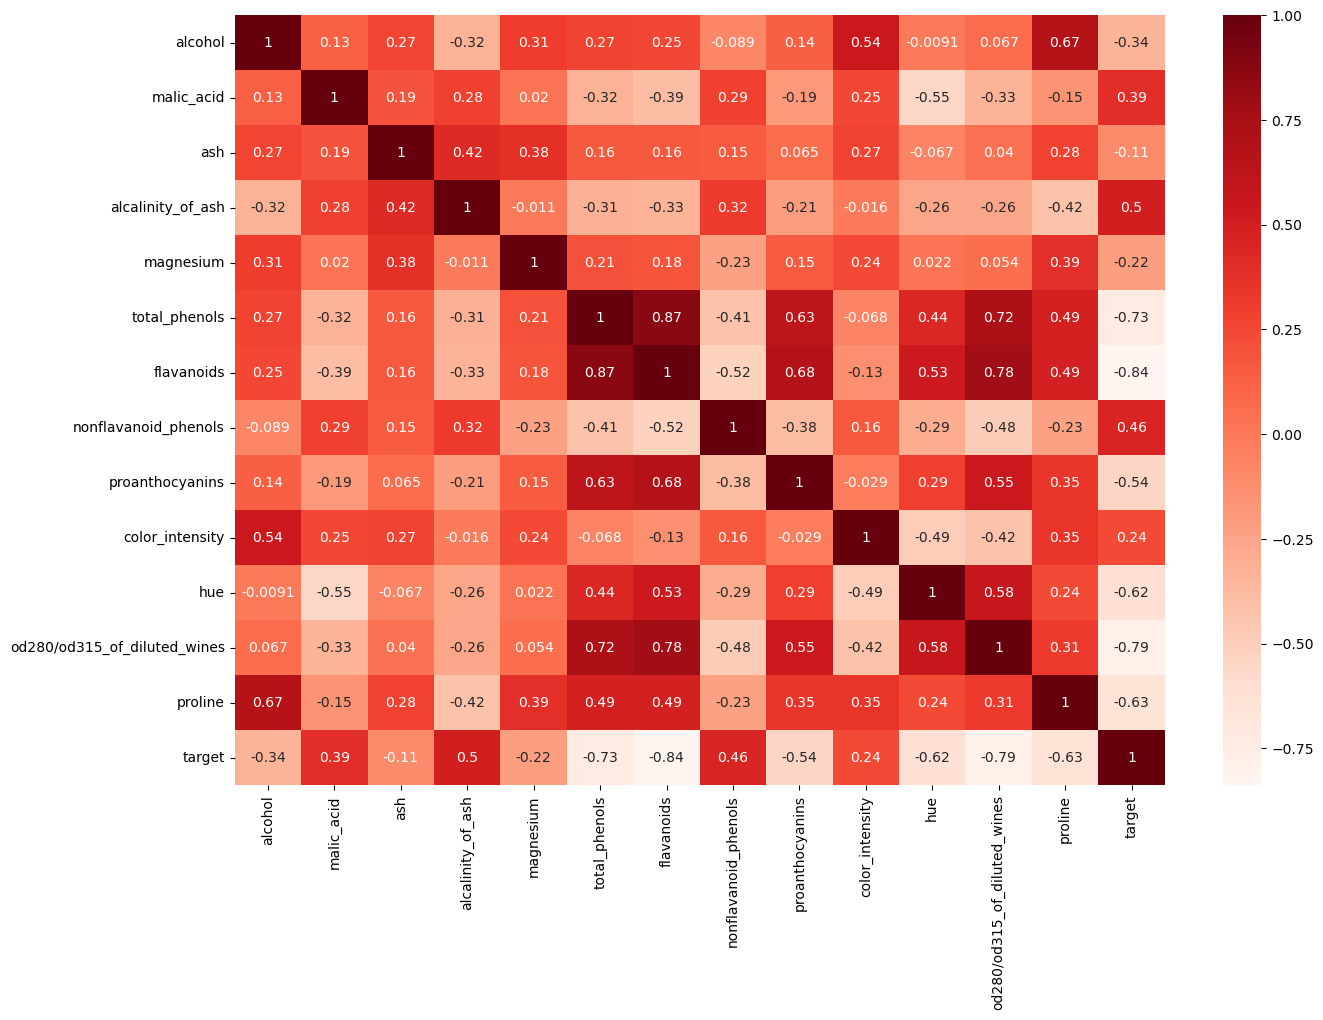

In [11]:
plt.figure(figsize=(15, 10))

correlation_matrix = df_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Reds')

plt.show()

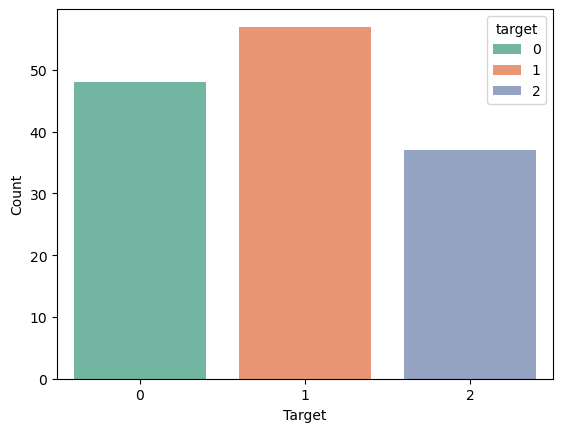

In [12]:
sns.countplot(x='target', hue='target',data=df_train, palette='Set2')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

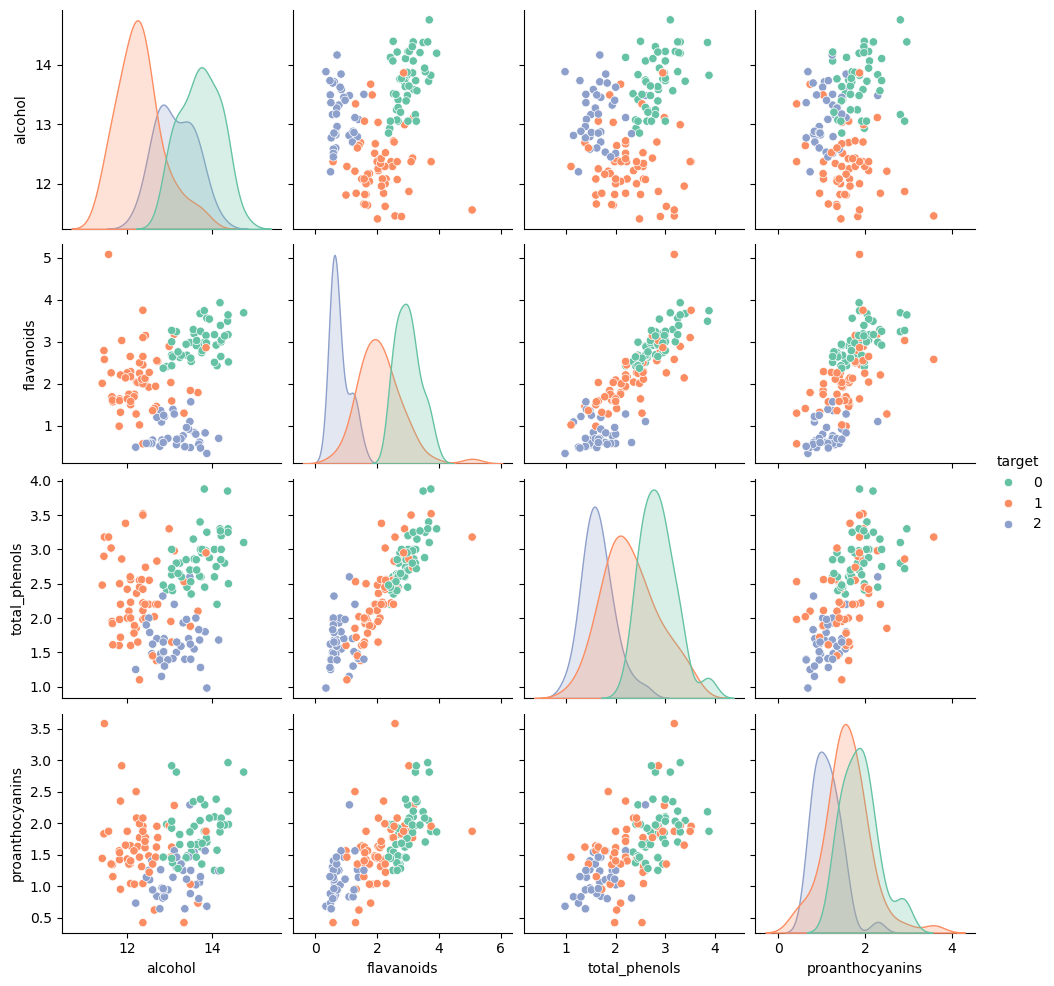

In [13]:


# בחר פיצ'רים רלוונטיים
selected_features = ['alcohol', 'flavanoids', 'total_phenols', 'proanthocyanins']

# צור DataFrame חדש עם הפיצ'רים הנבחרים ו- target
df_selected = df_train[selected_features + ['target']]

# Pair Plot
sns.pairplot(df_selected, hue='target', palette="Set2")
plt.show()


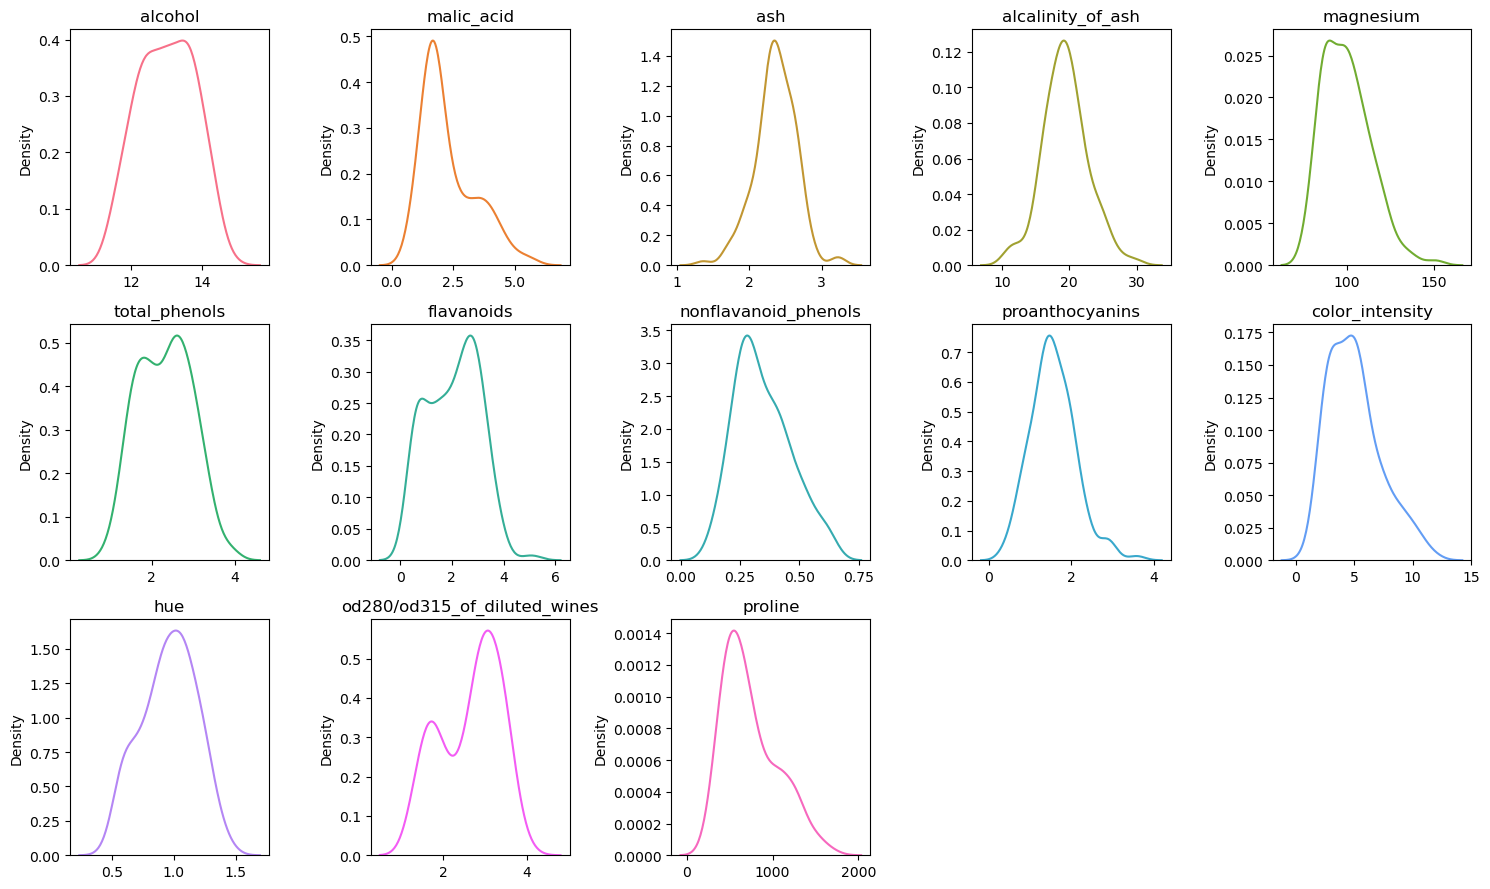

In [14]:

target_column = 'target'  
features = df_train.columns[df_train.columns != target_column]  # רשימת הפיצ'רים בלי הטרגט

n_features = len(features)
nrows = (n_features + 4) // 5  # Compute the number of rows needed

fig, axes = plt.subplots(nrows=nrows, ncols=5, figsize=(15, nrows * 3))

axes = axes.flatten()

# רשימת צבעים שניתן להשתמש בה
colors = sns.color_palette('husl', n_features)

for i, column in enumerate(features):
    sns.kdeplot(df_train[column], ax=axes[i], color=colors[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Density')

for i in range(n_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [15]:
X_train = df_train.drop(columns=['target'])
y_train = df_train['target']

X_test = df_test.drop(columns=['target'])
y_test = df_test['target']

In [16]:
# feature engineering:

# Standardize the data with StandardScaler
scaler_standard = StandardScaler()
X_train_scaled_standard = scaler_standard.fit_transform(X_train)
X_test_scaled_standard = scaler_standard.transform(X_test)

# Perform PCA for Standard Scaled Data
pca_standard = PCA(n_components=0.70)  # Keeping 70% of the variance
X_train_pca_standard = pca_standard.fit_transform(X_train_scaled_standard)
X_test_pca_standard = pca_standard.transform(X_test_scaled_standard)

# Min-Max Scaling
scaler_minmax = MinMaxScaler()
X_train_scaled_minmax = scaler_minmax.fit_transform(X_train)
X_test_scaled_minmax = scaler_minmax.transform(X_test)

# Perform PCA for Min-Max Scaled Data
pca_minmax = PCA(n_components=0.70)  # Keeping 70% of the variance
X_train_pca_minmax = pca_minmax.fit_transform(X_train_scaled_minmax)
X_test_pca_minmax = pca_minmax.transform(X_test_scaled_minmax)

# Define the KNN model and parameter grid
knn = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
scorer = make_scorer(f1_score, average='macro')

# Perform Grid Search with 5-fold Cross-Validation for KNN with Standard Scaled Data
grid_search_knn_standard = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring=scorer)
grid_search_knn_standard.fit(X_train_pca_standard, y_train)

# Perform Grid Search with 5-fold Cross-Validation for KNN with Min-Max Scaled Data
grid_search_knn_minmax = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring=scorer)
grid_search_knn_minmax.fit(X_train_pca_minmax, y_train)

# Perform Grid Search with 5-fold Cross-Validation for Decision Tree with Standard Scaled Data
decision_tree = DecisionTreeClassifier()
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30]
}

# Perform Grid Search with 5-fold Cross-Validation for DT with Standard Scaled Data
grid_search_dt_standard = GridSearchCV(estimator=decision_tree, param_grid=param_grid_dt, cv=5, scoring=scorer)
grid_search_dt_standard.fit(X_train_pca_standard, y_train)

# Perform Grid Search with 5-fold Cross-Validation for Decision Tree with Min-Max Scaled Data
grid_search_dt_minmax = GridSearchCV(estimator=decision_tree, param_grid=param_grid_dt, cv=5, scoring=scorer)
grid_search_dt_minmax.fit(X_train_pca_minmax, y_train)

# Print the results in a neat and organized way for knn
print("\n===== KNN Results =====")
print(f"Best parameters (Standard Scaled): {grid_search_knn_standard.best_params_}")
print(f"Best F1 score (Standard Scaled): {grid_search_knn_standard.best_score_:.4f}")
print(f"Best parameters (Min-Max Scaled): {grid_search_knn_minmax.best_params_}")
print(f"Best F1 score (Min-Max Scaled): {grid_search_knn_minmax.best_score_:.4f}")

# Predict and calculate F1 score for the best KNN models
y_pred_knn_standard = grid_search_knn_standard.best_estimator_.predict(X_test_pca_standard)
f1_knn_standard = f1_score(y_test, y_pred_knn_standard, average='macro')
print(f"Test F1 score (Standard Scaled): {f1_knn_standard:.4f}")

y_pred_knn_minmax = grid_search_knn_minmax.best_estimator_.predict(X_test_pca_minmax)
f1_knn_minmax = f1_score(y_test, y_pred_knn_minmax, average='macro')
print(f"Test F1 score (Min-Max Scaled): {f1_knn_minmax:.4f}")

# Print the results in a neat and organized way for DT
print("\n===== Decision Tree Results =====")
print(f"Best parameters (Standard Scaled): {grid_search_dt_standard.best_params_}")
print(f"Best F1 score (Standard Scaled): {grid_search_dt_standard.best_score_:.4f}")
print(f"Best parameters (Min-Max Scaled): {grid_search_dt_minmax.best_params_}")
print(f"Best F1 score (Min-Max Scaled): {grid_search_dt_minmax.best_score_:.4f}")

# Predict and calculate F1 score for the best Decision Tree models
y_pred_dt_standard = grid_search_dt_standard.best_estimator_.predict(X_test_pca_standard)
f1_dt_standard = f1_score(y_test, y_pred_dt_standard, average='macro')
print(f"Test F1 score (Standard Scaled): {f1_dt_standard:.4f}")

y_pred_dt_minmax = grid_search_dt_minmax.best_estimator_.predict(X_test_pca_minmax)
f1_dt_minmax = f1_score(y_test, y_pred_dt_minmax, average='macro')
print(f"Test F1 score (Min-Max Scaled): {f1_dt_minmax:.4f}")

# Print the best model overall
best_model = None
best_score = 0
if grid_search_knn_standard.best_score_ > best_score:
    best_model = "KNN (Standard Scaled)"
    best_score = grid_search_knn_standard.best_score_
if grid_search_knn_minmax.best_score_ > best_score:
    best_model = "KNN (Min-Max Scaled)"
    best_score = grid_search_knn_minmax.best_score_
if grid_search_dt_standard.best_score_ > best_score:
    best_model = "Decision Tree (Standard Scaled)"
    best_score = grid_search_dt_standard.best_score_
if grid_search_dt_minmax.best_score_ > best_score:
    best_model = "Decision Tree (Min-Max Scaled)"
    best_score = grid_search_dt_minmax.best_score_



# Compute cross-validated F1 score for KNN with Standard Scaled Data
cv_scores_knn_standard = cross_val_score(grid_search_knn_standard.best_estimator_, X_train_pca_standard, y_train, cv=5, scoring='f1_macro')
print(f"Cross-validated F1 score (Standard Scaled) for KNN: {cv_scores_knn_standard.mean():.4f}")

# Compute cross-validated F1 score for KNN with Min-Max Scaled Data
cv_scores_knn_minmax = cross_val_score(grid_search_knn_minmax.best_estimator_, X_train_pca_minmax, y_train, cv=5, scoring='f1_macro')
print(f"Cross-validated F1 score (Min-Max Scaled) for KNN: {cv_scores_knn_minmax.mean():.4f}")

# Compute cross-validated F1 score for Decision Tree with Standard Scaled Data
cv_scores_dt_standard = cross_val_score(grid_search_dt_standard.best_estimator_, X_train_pca_standard, y_train, cv=5, scoring='f1_macro')
print(f"Cross-validated F1 score (Standard Scaled) for Decision Tree: {cv_scores_dt_standard.mean():.4f}")

# Compute cross-validated F1 score for Decision Tree with Min-Max Scaled Data
cv_scores_dt_minmax = cross_val_score(grid_search_dt_minmax.best_estimator_, X_train_pca_minmax, y_train, cv=5, scoring='f1_macro')
print(f"Cross-validated F1 score (Min-Max Scaled) for Decision Tree: {cv_scores_dt_minmax.mean():.4f}")


print(f"\n===== Best Model Overall =====")
print(f"Best model: {best_model}")
print(f"Best cross-validation F1 score (macro): {best_score:.4f}")



===== KNN Results =====
Best parameters (Standard Scaled): {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Best F1 score (Standard Scaled): 0.9790
Best parameters (Min-Max Scaled): {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best F1 score (Min-Max Scaled): 0.9800
Test F1 score (Standard Scaled): 0.9177
Test F1 score (Min-Max Scaled): 0.9454

===== Decision Tree Results =====
Best parameters (Standard Scaled): {'criterion': 'gini', 'max_depth': 10}
Best F1 score (Standard Scaled): 0.9338
Best parameters (Min-Max Scaled): {'criterion': 'gini', 'max_depth': None}
Best F1 score (Min-Max Scaled): 0.9512
Test F1 score (Standard Scaled): 0.9193
Test F1 score (Min-Max Scaled): 0.9458
Cross-validated F1 score (Standard Scaled) for KNN: 0.9790
Cross-validated F1 score (Min-Max Scaled) for KNN: 0.9800
Cross-validated F1 score (Standard Scaled) for Decision Tree: 0.9261
Cross-validated F1 score (Min-Max Scaled) for Decision Tree: 0.9512

===== Best Model Overal

In [17]:
# הכנת טבלת סיכום נתונים
summary_data = {
    'Model': ['KNN (Standard Scaled)', 'KNN (Min-Max Scaled)', 'Decision Tree (Standard Scaled)', 'Decision Tree (Min-Max Scaled)'],
    'Best Parameters': [
        grid_search_knn_standard.best_params_,
        grid_search_knn_minmax.best_params_,
        grid_search_dt_standard.best_params_,
        grid_search_dt_minmax.best_params_
    ],
    'Best Cross-Validation F1 Score': [
        grid_search_knn_standard.best_score_,
        grid_search_knn_minmax.best_score_,
        grid_search_dt_standard.best_score_,
        grid_search_dt_minmax.best_score_
    ],
    'Test F1 Score': [
        f1_knn_standard,
        f1_knn_minmax,
        f1_dt_standard,
        f1_dt_minmax
    ]
}

# יצירת ה-DataFrame
df_summary = pd.DataFrame(summary_data)

# מציאת המודל הטוב ביותר (המבוסס על ה-Test F1 Score או ה-Cross-Validation לפי בחירתך)
best_model_index = df_summary['Best Cross-Validation F1 Score'].idxmax()
best_model = df_summary.loc[best_model_index, 'Model']

# הוספת עמודה למודל הכולל הטוב ביותר
df_summary['Best Overall Model'] = best_model

# הצגת ה-DataFrame
df_summary


,Model,Best Parameters,Best Cross-Validation F1 Score,Test F1 Score,Best Overall Model
0,KNN (Standard Scaled),"{'metric': 'euclidean', 'n_neighbors': 7, 'wei...",0.978968,0.917729,KNN (Min-Max Scaled)
1,KNN (Min-Max Scaled),"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.979971,0.945373,KNN (Min-Max Scaled)
2,Decision Tree (Standard Scaled),"{'criterion': 'gini', 'max_depth': 10}",0.933841,0.919312,KNN (Min-Max Scaled)
3,Decision Tree (Min-Max Scaled),"{'criterion': 'gini', 'max_depth': None}",0.951157,0.945825,KNN (Min-Max Scaled)


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [18]:
# Scale the features with MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.7)  # Preserve 70% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Create the KNN model with the best parameters
best_model_knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean', weights='uniform')

# Train the model on the entire training set
best_model_knn.fit(X_train_pca, y_train)

# Predict on the test set
y_pred_knn = best_model_knn.predict(X_test_pca)  # חיזוי התחזיות

# Evaluate the performance on the test setS
report_knn = classification_report(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='macro')

print("Classification Report for Best KNN Model:")
print(report_knn)
print(f"Macro F1 Score for Best KNN Model: {f1_knn}")


Classification Report for Best KNN Model:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.86      0.92        14
           2       0.92      1.00      0.96        11

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36

Macro F1 Score for Best KNN Model: 0.9453734671125975


## Part 5 - Apply on test and show model performance estimation

In [19]:
# Predict on the test set
y_pred_knn = best_model_knn.predict(X_test_pca)

# Evaluate the performance on the test set
predictions_df = pd.DataFrame({
    'Actual': y_test[:20],
    'Predicted': y_pred_knn[:20],
    'Correct': y_test[:20] == y_pred_knn[:20]
})

print("Performance Estimation for the First Few Predictions:")
print(predictions_df)

# Calculate F1 score and accuracy
f1_test = f1_score(y_test, y_pred_knn, average='macro')
accuracy_test = accuracy_score(y_test, y_pred_knn)

print(f"\nTest F1 score: {f1_test:.4f}")
print(f"Test Accuracy: {accuracy_test:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))


Performance Estimation for the First Few Predictions:
    Actual  Predicted  Correct
0        2          2     True
1        0          0     True
2        2          2     True
3        1          1     True
4        2          2     True
5        1          1     True
6        0          0     True
7        1          1     True
8        1          0    False
9        1          1     True
10       1          1     True
11       0          0     True
12       0          0     True
13       2          2     True
14       1          1     True
15       2          2     True
16       1          1     True
17       0          0     True
18       1          1     True
19       1          1     True

Test F1 score: 0.9454
Test Accuracy: 0.9444

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.86      0.92        14
           2       0.92      1.00      0.96        11

    accu

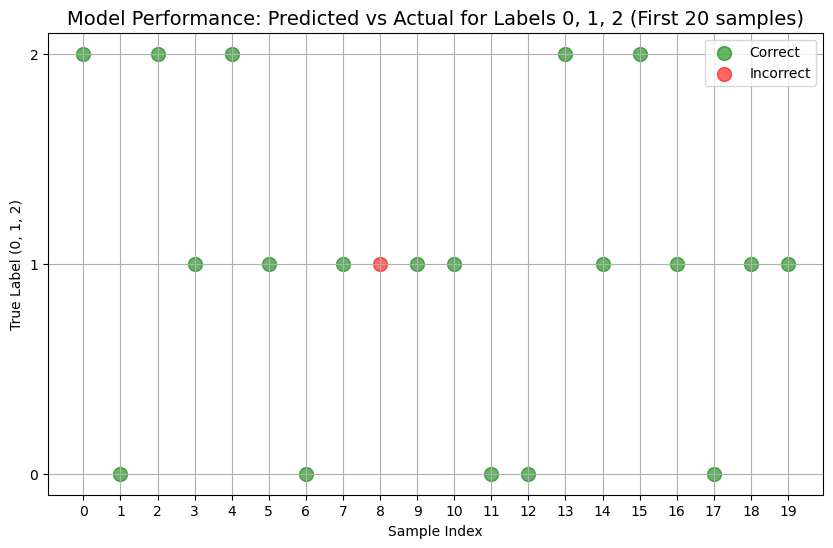

In [20]:
# סינון הדוגמאות שהן 0, 1, ו-2 בלבד והגבלת התצוגה ל-20 דוגמאות ראשונות
filtered_indices = np.where(np.isin(y_test[:20], [0, 1, 2]))[0]
y_test_filtered = y_test[filtered_indices]
y_pred_test_filtered = y_pred_knn[filtered_indices]  # עדכון לשימוש ב-y_pred_knn

# חישוב הנקודות הנכונות והשגויות
correct_predictions = np.where(y_test_filtered == y_pred_test_filtered)[0]
incorrect_predictions = np.where(y_test_filtered != y_pred_test_filtered)[0]

# יצירת אינדקסים רציפים עבור התצוגה
indices = np.arange(len(y_test_filtered))

# הגדרת גודל גרף
plt.figure(figsize=(10, 6))

# יצירת הפיזור (Scatter Plot) לנקודות נכונות ושגויות
plt.scatter(indices[correct_predictions], y_test_filtered[correct_predictions], color='green', label='Correct', alpha=0.6, s=100)
plt.scatter(indices[incorrect_predictions], y_test_filtered[incorrect_predictions], color='red', label='Incorrect', alpha=0.6, s=100)

# הגבלת ציר ה-Y לתוויות 0, 1, ו-2 בלבד
plt.yticks([0, 1, 2])

# הגדרת ציר ה-X כך שיציג רק אינדקסים שלמים
plt.xticks(np.arange(len(y_test_filtered)))

# תוויות ואסתטיקה
plt.title("Model Performance: Predicted vs Actual for Labels 0, 1, 2 (First 20 samples)", fontsize=14)
plt.xlabel("Sample Index")
plt.ylabel("True Label (0, 1, 2)")
plt.legend(loc='upper right')
plt.grid(True)

# הצגת הגרף
plt.show()
